# Duplex example
To run on google colab uncomment the following line

In [1]:
#!pip install matplotlib lavavu-osmesa LoopStructural

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LoopStructural import GeologicalModel
from LoopStructural.visualisation.model_visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_duplex
import matplotlib.pyplot as plt


In [2]:
data, boundary_points = load_duplex()

In [3]:
splay_region = lambda pos : np.logical_or(pos[:,0] < (-6.5-model.origin[0])/model.scale_factor, pos[:,0] 
                                          > (5-model.origin[0])/model.scale_factor)

In [4]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(data)

2021-08-11 23:31:59,197 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute
2021-08-11 23:31:59,197 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute



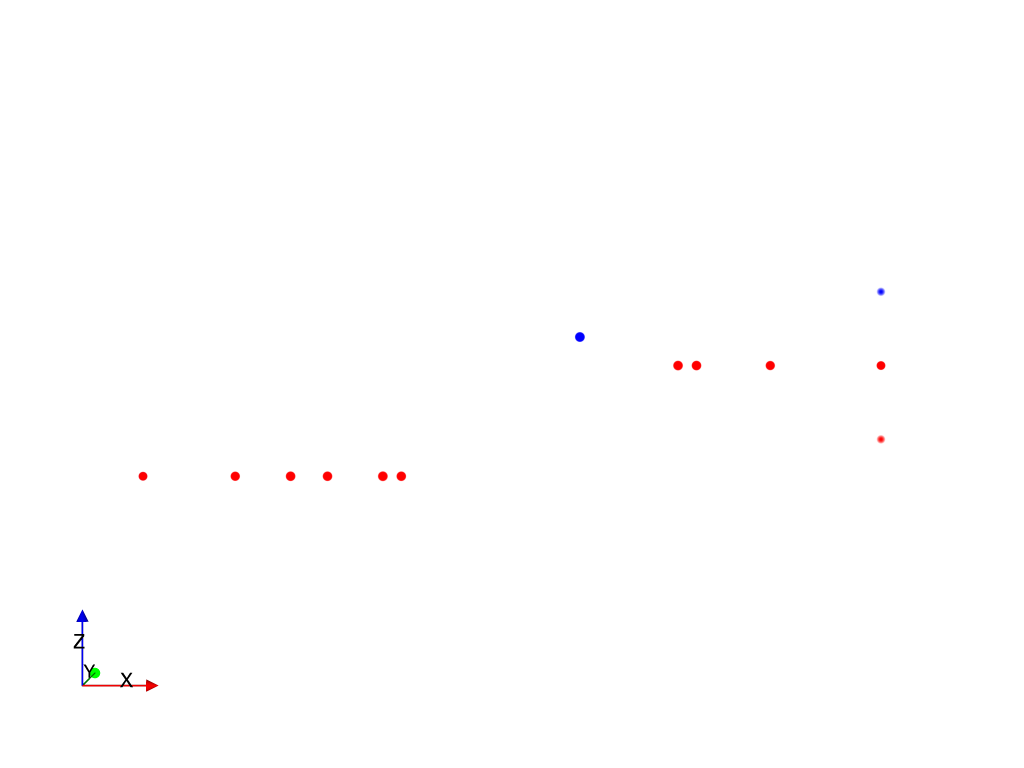

'fault_data.png'

In [5]:
viewer = LavaVuModelViewer(model)

viewer.add_points(model.data[np.logical_and(data['feature_name']=='fault2',data['coord']==0)][['X','Y','Z']],
                  name='f1',pointsize=10,colour='red')

viewer.add_points(model.data[np.logical_and(data['feature_name']=='fault1',data['coord']==0)][['X','Y','Z']],
                  name='f2',pointsize=10,colour='blue')

viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault_data.png')

In [6]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:],rescale=False)
model.set_model_data(data)
fault1 = model.create_and_add_fault('fault2',
                                    -1.2,
                                    nelements=1e4,
                                    solver='lu',
                                    interpolatortype='FDI',
                                   damp = True,
                                    buffer=np.array([1,0.3,0.3]),
                                    regularisation=[2.,.4,.4],
                                    gxxgy=4.,
                                    gxxgz=4.,
                                    gyxgz=4.,
                                    force_mesh_geometry=True,
                                    steps=10,
                                    cpw=10
                                   )

fault2 = model.create_and_add_fault('fault1',
                                    -1.2,
                                    nelements=4000,
                                    solver='lu',
                                    interpolatortype='FDI',
                                   damp = True,
                                    splayregion=splay_region,
                                    splay = fault1,
                                    regularisation=[1.,.5,.5],
                                    gxxgy=4.,
                                    gxxgz=4.,
                                    gyxgz=4.,
                                    buffer=np.array([1.6,.2,0.3]),
                                    force_mesh_geometry=True,
                                    steps=10,
                                    cpw=10,
                                    overprints=['fault2']
                                   )
strati = model.create_and_add_foliation('strati',
                                        solver='lu',
                                        interpolatortype='FDI', 
                                        nelements=1e3,
                                        damp=True,
                                        buffer=2.
                                       )
model.update()

2021-08-11 23:32:03,238 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute
2021-08-11 23:32:03,238 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute


  0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([100,20,100])
viewer.add_isosurface(model['fault2'],value=0,colour='red')
viewer.add_isosurface(model['fault1'],value=0,colour='blue')

viewer.add_scalar_field(strati,cmap='tab20')
viewer.interactive()

### Figure for Fault 1 showing interpolation nodes for fault 2

[False False  True ... False  True  True]



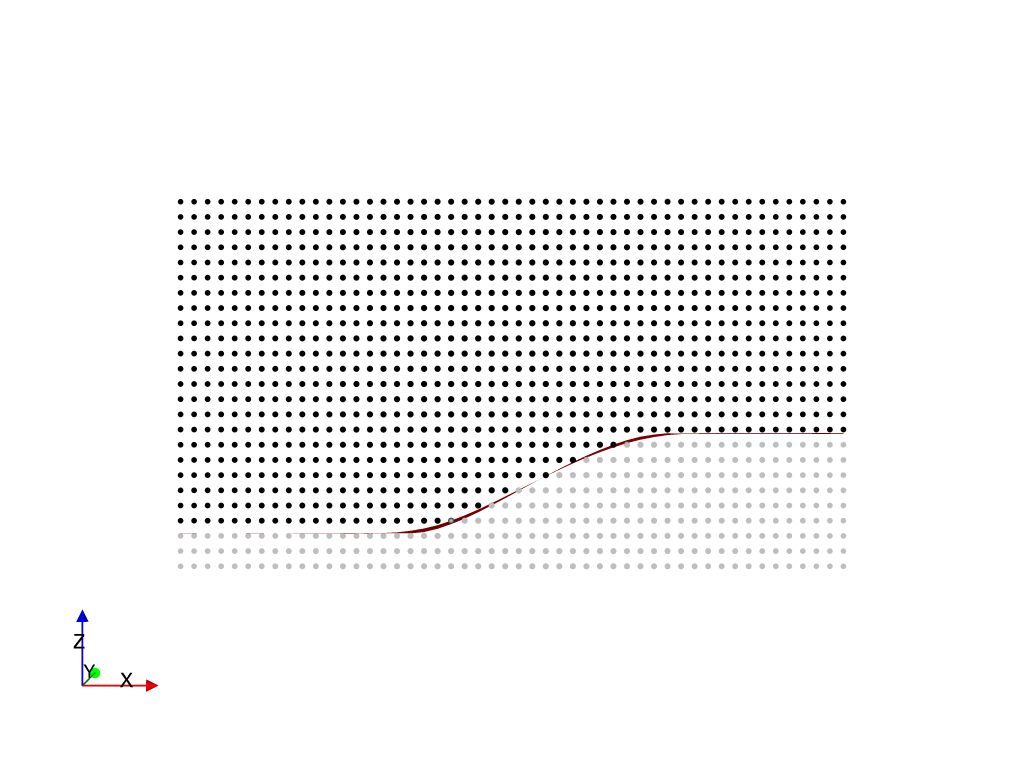

In [8]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1,
                      isovalue=0,

                     )

nodes = model.regular_grid()

p1 = viewer.lv.points('nodes2',pointsize=6,colour='grey')
print(fault1.evaluate(nodes))
p1.vertices(model.rescale(nodes[~fault1.evaluate(nodes).astype(bool),:],inplace=False))
nodes  = nodes[fault1.evaluate(nodes).astype(bool),:]
p = viewer.lv.points('nodes',pointsize=6,colour='black')
p.vertices(model.rescale(nodes,inplace=False))

viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.image('points_before_fault.png')
viewer.lv.display()

### Figure showing fault 1 displacement field


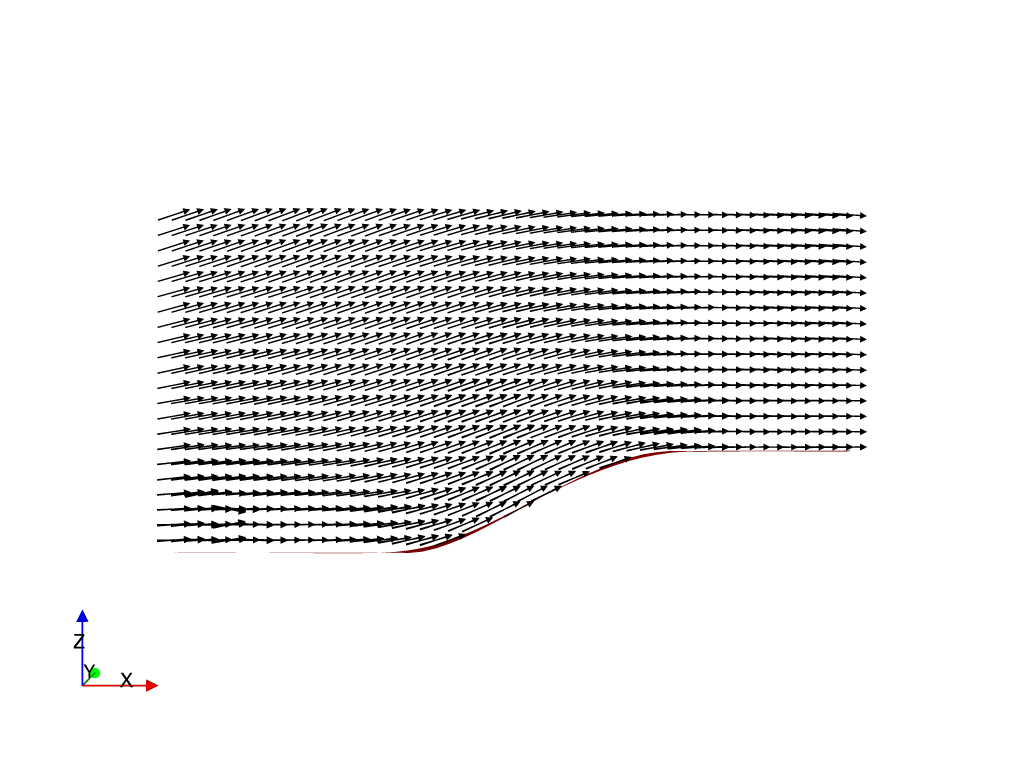

'fault1_displacement_vectors.png'

In [9]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1,
                      isovalue=0,
                     )

viewer.add_vector_field(fault1[1],locations=nodes)
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -2
viewer.lv['ymin'] = -2
viewer.lv['zmin'] = -2
viewer.lv['xmax'] = 2
viewer.lv['ymax'] = 2
viewer.lv['zmax'] = 2
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault1_displacement_vectors.png')


### Figure for fault 2 surfaces


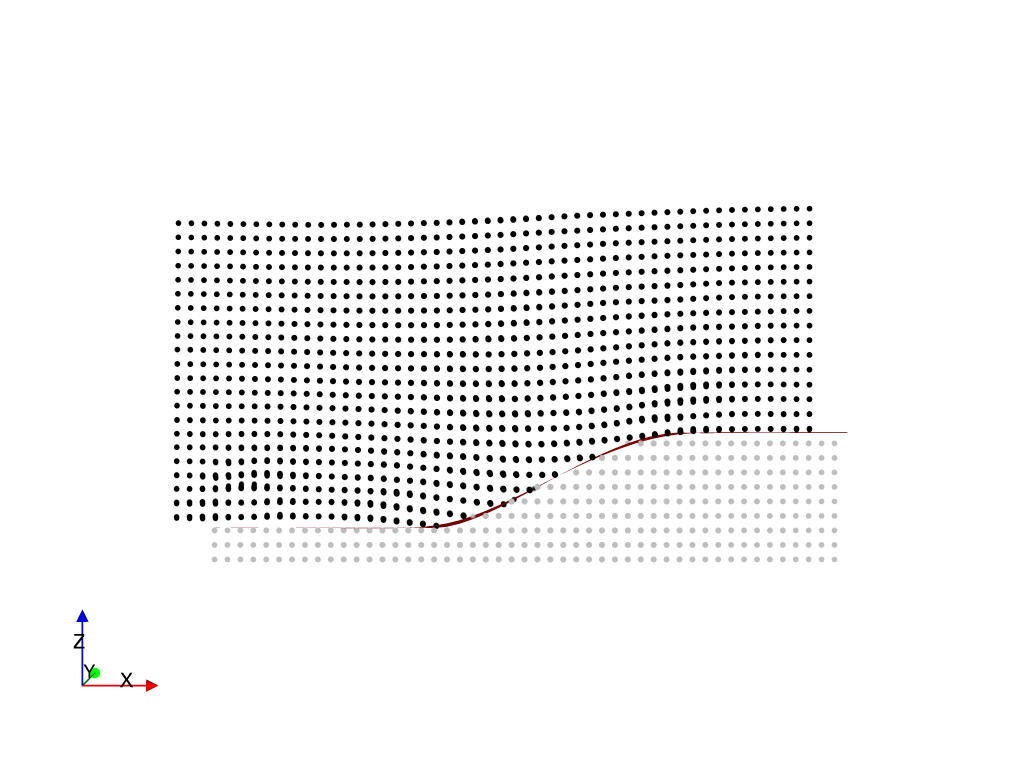

'fault1_point_displaced.png'

In [10]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1,
                      isovalue=0,
                     )

nodes = model.regular_grid()

p1 = viewer.lv.points('nodes',pointsize=6,colour='grey')
p1.vertices(model.rescale(nodes[~fault1.evaluate(nodes),:],inplace=False))
nodes  = nodes[fault1.evaluate(nodes),:]

nodes = fault1.apply_to_points(nodes)
p = viewer.lv.points('nodes_faulted',pointsize=6,colour='black')
p.vertices(model.rescale(nodes,inplace=False))

viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault1_point_displaced.png')

### Fault 2 displacement vectors

In [11]:
tmp = fault2[1].faults

In [12]:
fault2[1].faults  = tmp
fault2[0].faults  = tmp


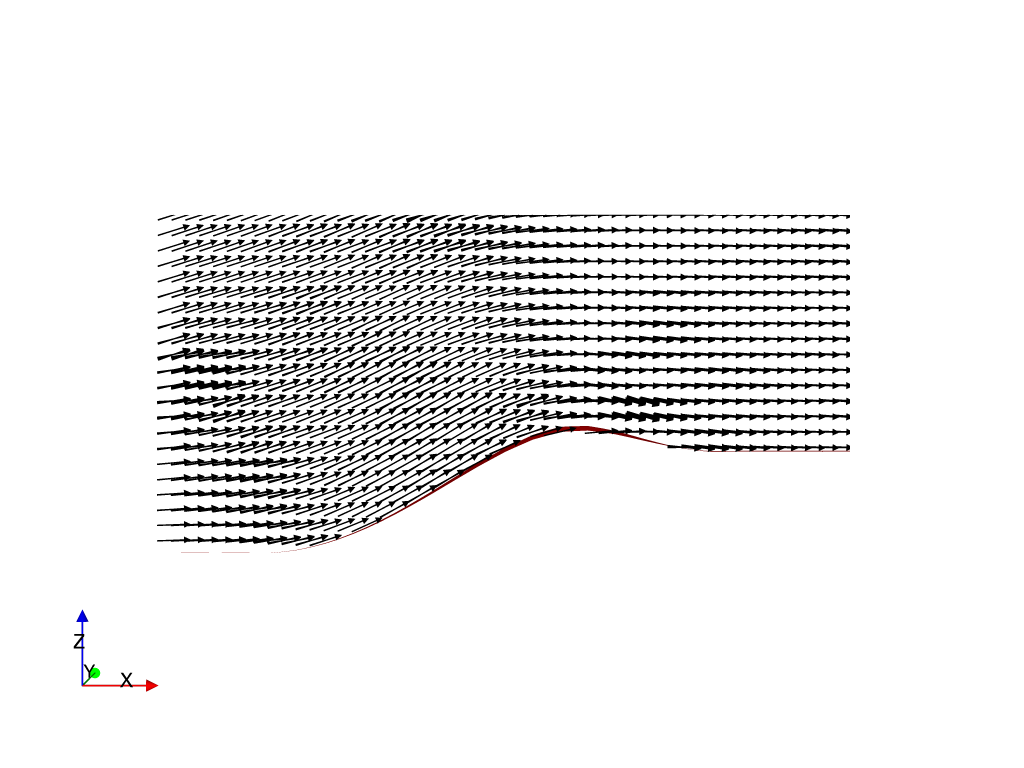

'fault2_displacement_vectors.png'

In [13]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault2,
                      isovalue=0,
                     )

nodes2 = model.regular_grid()
nodes2  = nodes2[fault2.evaluate(nodes2),:]
nodes2 = nodes2

viewer.add_vector_field(fault2[1],locations=nodes2)
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.display()
viewer.lv.image('fault2_displacement_vectors.png')

### Figure showing both node movements

In [14]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1,
                      isovalue=0,
                      colour='red'
                     )

viewer.add_isosurface(fault2,
                      isovalue=0,
                      colour='blue'
                      )

nodes = model.regular_grid()
p1 = viewer.lv.points('nodes',pointsize=6,colour='grey')
p1.vertices(model.rescale(nodes[~fault1.evaluate(nodes),:],inplace=False))
nodes  = nodes[fault1.evaluate(nodes),:]

nodes = fault1.apply_to_points(nodes)
p = viewer.lv.points('nodes_faulted3',pointsize=6,colour='grey')

p.vertices(model.rescale(nodes[~fault2.evaluate(nodes),:],inplace=False))
nodes = fault2.apply_to_points(nodes)


p = viewer.lv.points('nodes_faulted2',pointsize=6,colour='black')
p.vertices(model.rescale(nodes[fault2.evaluate(nodes),:],inplace=False))

viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.interactive()
# viewer.lv.display()
viewer.lv.image('points_both_fault.png')

'points_both_fault.png'

### Figure showing data

### Figure showing faults


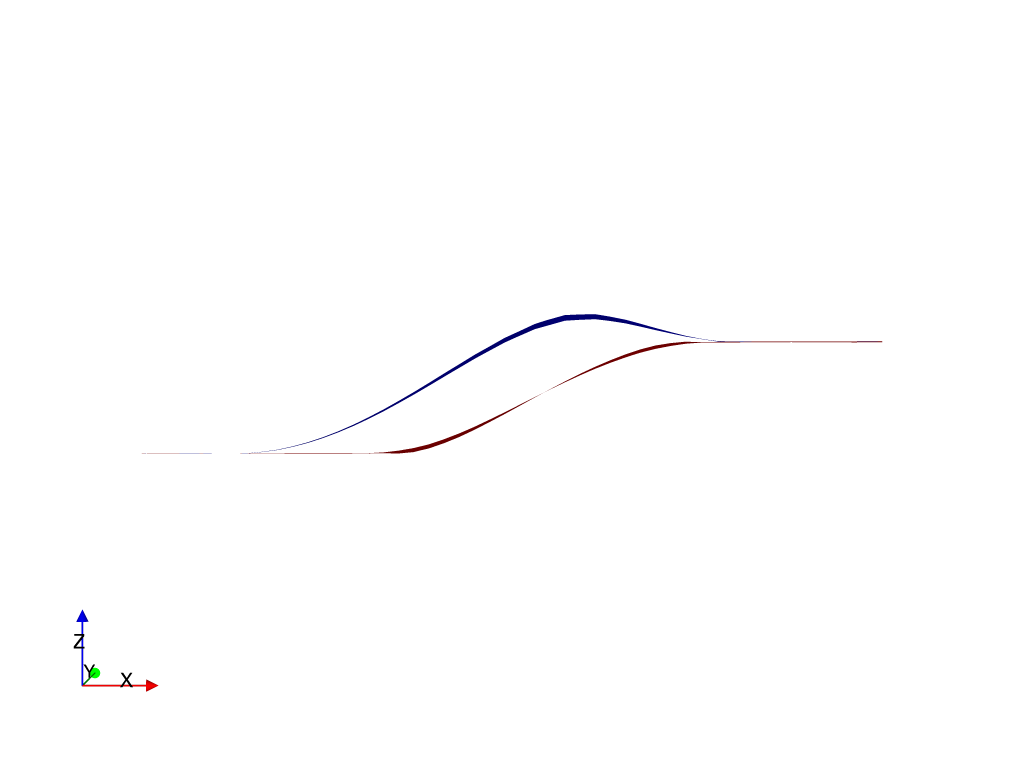

'fault_network.png'

In [15]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1,
                      isovalue=0,
                      colour='red'
                     )
viewer.add_isosurface(fault2,
                      isovalue=0,
                      colour='blue'
                     )

viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1

viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault_network.png')

### Figure showing faulted strati


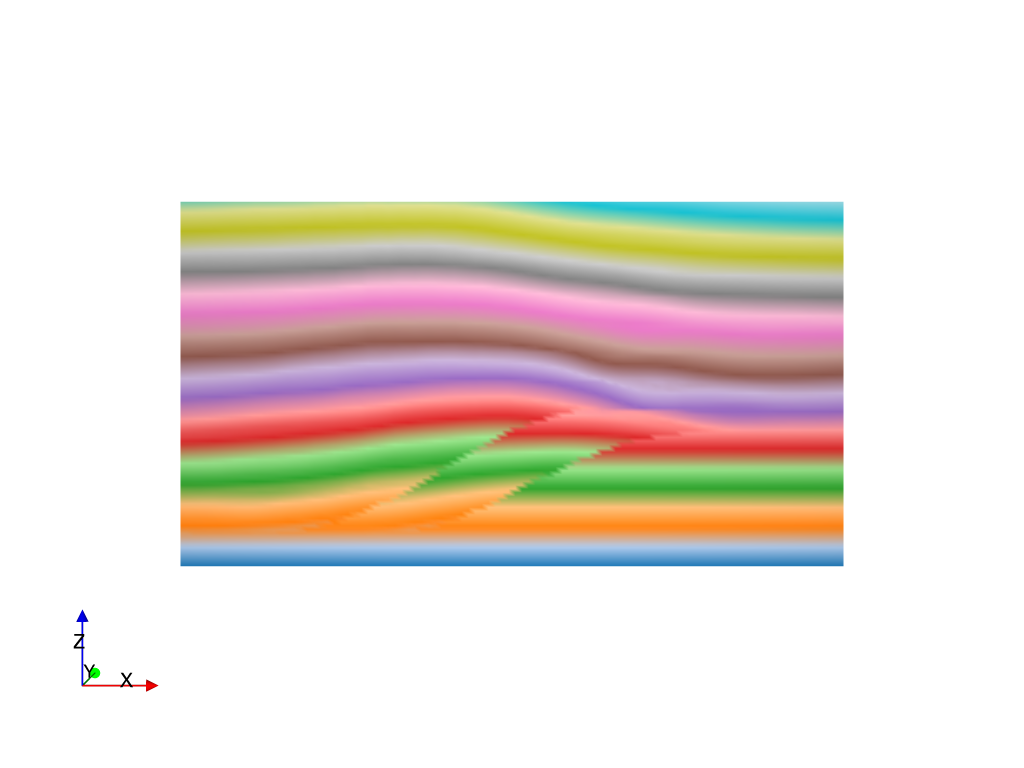

In [16]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([100,20,100])

viewer.add_scalar_field(strati,cmap='tab20')
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.image('fault_duplex_scalar_field.png')
viewer.lv.display()

### Add all of the plots to a matplotlib figure

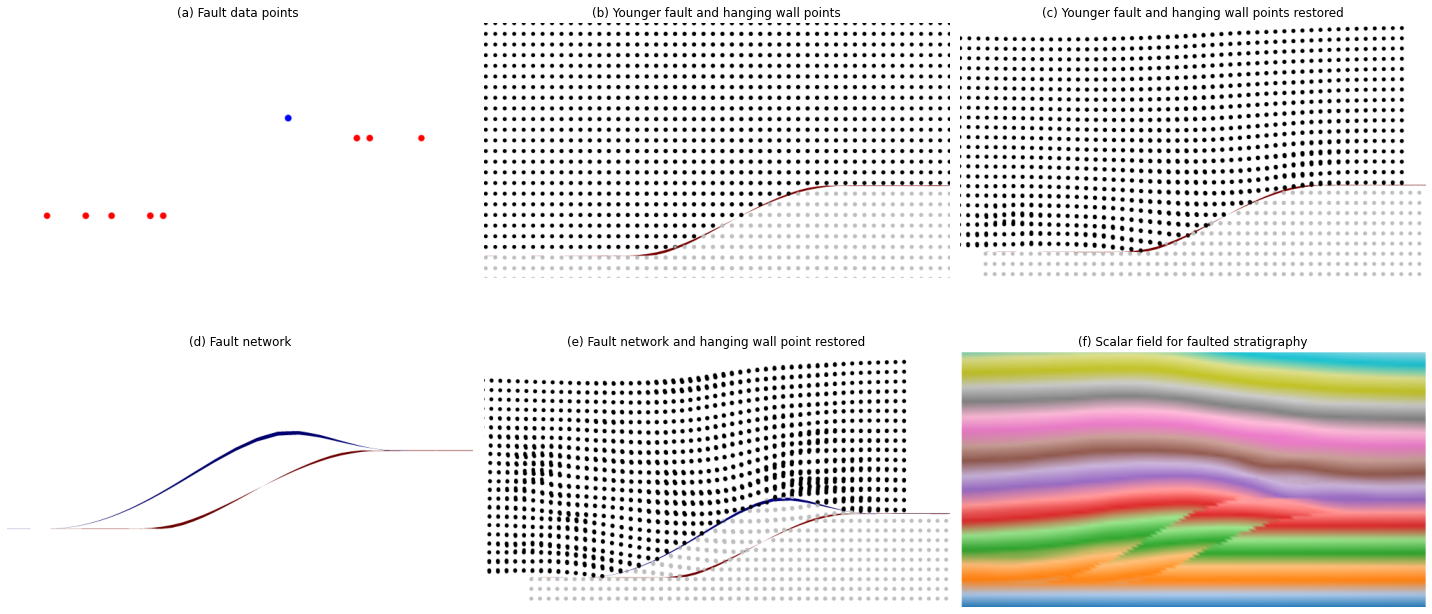

In [20]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].imshow(plt.imread('fault_data.png')[200:565, 178:844,:])
ax[0,0].set_title('(a) Fault data points ')
ax[0,1].imshow(plt.imread('points_before_fault.png')[200:565, 178:844,:])
ax[0,1].set_title('(b) Younger fault and hanging wall points')
ax[0,2].imshow(plt.imread('fault1_point_displaced.png')[200:565, 178:844,:])
ax[0,2].set_title('(c) Younger fault and hanging wall points restored')
ax[1,0].imshow(plt.imread('fault_network.png')[200:565, 178:844,:])
ax[1,0].set_title('(d) Fault network')
ax[1,1].imshow(plt.imread('points_both_fault.png')[200:565, 178:844,:])
ax[1,1].set_title('(e) Fault network and hanging wall point restored')
ax[1,2].imshow(plt.imread('fault_duplex_scalar_field.png')[200:565, 178:844,:])
ax[1,2].set_title('(f) Scalar field for faulted stratigraphy')

for i in range(2):
    for j in range(3):
        ax[i,j].axis('off')
plt.tight_layout()
# plt.

## Export to webgl

In [18]:
viewer.clear()
viewer.add_scalar_field(strati,cmap='tab20')
viewer.add_isosurface(strati,nslices=5,paint_with=strati,cmap='tab20')
viewer.add_isosurface(fault1,value=0)
viewer.add_isosurface(fault2,value=0)
viewer.interactive()

In [19]:
viewer.export_to_webgl('duplex_example')